<a href="https://colab.research.google.com/github/jordantcarlisle/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jordan_Carlisle_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [71]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- ✅ Load the data as a `pandas` data frame.
- ✅ Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- ✅ Validate that you have no missing values.
- ✅ Add informative names to the features.
- ✅  The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [93]:
# TODO
import pandas as pd
breast_cancer_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

#adding descriptive header names
column_headers = ['age', 'operation_year', 'positive_nodes', 'survival_status']
df_breast_cancer = pd.read_csv(breast_cancer_url, names=column_headers)

#df_breast_cancer['survival_status'] = df_breast_cancer.replace(to_replace=1, value=0 )
df_breast_cancer['survival_status'] = df_breast_cancer['survival_status'].replace(2, 0)
#df_breast_cancer.replace(to_replace=2, value=1 ), This didn't work


df_breast_cancer.head()

,age,operation_year,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [73]:
#checking for missing data. The UCI documentaitons states that there are 306 instances and 4 attributes for each observation. This dataset is as labeled.
df_breast_cancer.shape

(306, 4)

In [74]:
#because there are no 'na' values then this dataset is not missing values
df_breast_cancer.isna().sum()
# there are no missing values

age                0
operation_year     0
positive_nodes     0
survival_status    0
dtype: int64

In [0]:
#THIS DIDN'T WORK BECAUSE MY SYNTAX WAS SLIGHTLY OFF. See answer above for corrections. 
#df_breast_cancer['survival_status'].replace(1,0)
#df_breast_cancer['survival_status'].replace(2,1)

## Part 2 - Examine the distribution and relationships of the features

✅ Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
#Declaring things to make less typing
age_bins = pd.cut(df_breast_cancer['age'], 10)
node_bins = pd.cut(df_breast_cancer['positive_nodes'], 5)
survival = df_breast_cancer['survival_status']
operation = df_breast_cancer['operation_year']

In [77]:
# TODO
pd.crosstab(node_bins, survival).T

positive_nodes   (-0.052, 10.4]  (10.4, 20.8]  ...  (31.2, 41.6]  (41.6, 52.0]
survival_status                                ...                            
0                            58            15  ...             1             1
1                           208            11  ...             0             1

[2 rows x 5 columns]

In [78]:
pd.crosstab(operation, survival).T

operation_year,58,59,60,61,62,63,64,65,66,67,68,69
survival_status,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


In [79]:
#I thought normalizing would help see the percentage of survived greater than 5 years versus less over the years. 
pd.crosstab(survival, operation, normalize=True)

operation_year,58,59,60,61,62,63,64,65,66,67,68,69
survival_status,,,,,,,,,,,,
0,0.039216,0.029412,0.013072,0.009804,0.022876,0.026144,0.026144,0.042484,0.019608,0.013072,0.009804,0.013072
1,0.078431,0.058824,0.078431,0.075163,0.052288,0.071895,0.075163,0.049020,0.071895,0.068627,0.032680,0.022876


In [80]:
pd.crosstab(survival, [age_bins, node_bins])

age             (29.947, 35.3]               ...   (72.4, 77.7]   (77.7, 83.0]
positive_nodes  (-0.052, 10.4] (10.4, 20.8]  ... (-0.052, 10.4] (-0.052, 10.4]
survival_status                              ...                              
0                            2            0  ...              1              2
1                           12            1  ...              6              0

[2 rows x 28 columns]

In [96]:
import seaborn as sns
#use for sns.distplot for potential visualizaitons. "measures of central tendency"
#seaborn scatterplots, which could give me some hues for different outcomes 

df_breast_cancer.describe()

,age,operation_year,positive_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# bc_dist= df_breast_cancer.describe()
# sns.distplot(bc_dist,bins=None, hist=True)
# I need to learn more about the colors kwarg 

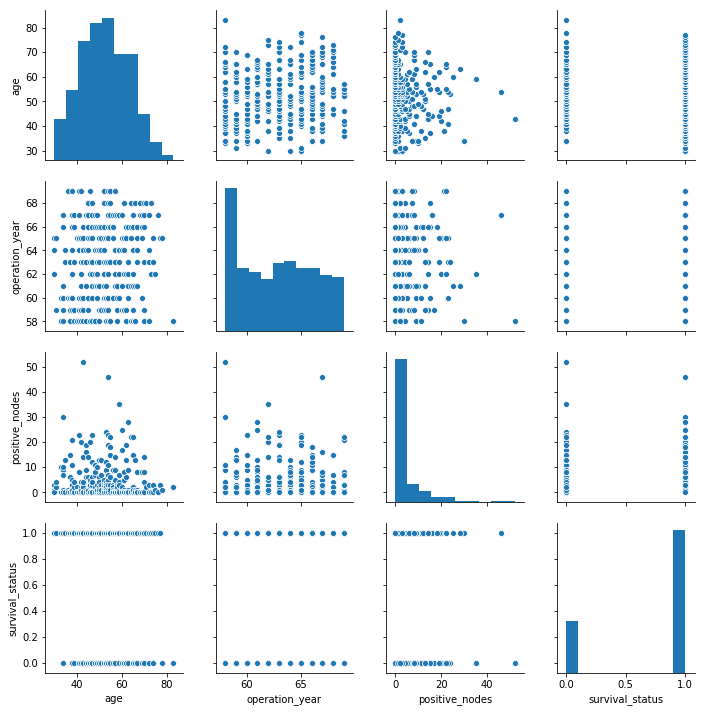

In [82]:
sns.pairplot(df_breast_cancer) #hue=) didn't get far enough into the documentation to use hue for this assignment.

###Interesting Observations


*   Age as a independent variable (x) and positive nodes as a dependent variable (y) seems to be the most insightful; however, it still seems inconclusive. There are fewer cases of high positive nodes for older observations. If I could layer on survival status, I think this would illuminate a bit more of the story. There are fewer breast cancer survivors that live longer than five years as the data trends towards 80 years old. This could mean that higher positive nodes are never observed because fewer patients live long enough to see a greter number of nodes. 




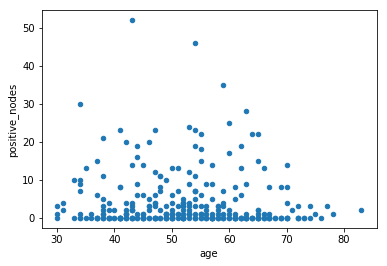

In [83]:
df_breast_cancer.plot.scatter('age','positive_nodes')

In [0]:
# import matplotlib.pyplot as plt
# import numpy as np

# #example from matplotlib documentation formatted with the breast cancer use case. Not all of it works. 
# labels = df_breast_cancer['age']
# survived = df_breast_cancer['survival_status'] = 1
# died = df_breast_cancer['survival_status'] = 0

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, survived, width, label='Survived')
# rects2 = ax.bar(x + width/2, died, width, label='Died')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Survived')
# ax.set_title('Breast Cancer Survival')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# plt.show()

## Part 3 - DataFrame Filtering

❌ Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

❌ Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [103]:
# TODO
survived = df_breast_cancer[df_breast_cancer['survival_status'] == 1]
survived.head()

,age,operation_year,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


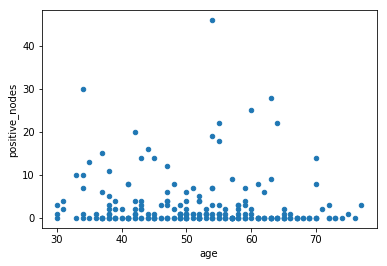

In [101]:
survived.plot.scatter('age','positive_nodes')

In [102]:
died = df_breast_cancer[df_breast_cancer['survival_status'] == 0]
died.head()

,age,operation_year,positive_nodes,survival_status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


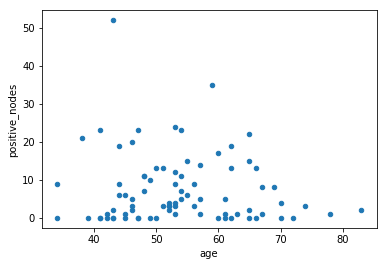

In [105]:
died.plot.scatter('age','positive_nodes')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



1.   Between 1960 and 1964 survival rates seem to be increasing, but there were also a larger number of cases. Then, after 1965 the survival rate decreases but there are fewer bumber of cases. This is especially true in 1968 and 1969 where there are only 13 and 11 cases respectively compared to the 20-30 cases per year from 1958 to 1967. 
2.   Age seems to have a negative relationship with survival; however, it's difficult to tell because there are fewer cases. This could be because people die of other causes. 
3.   There appears to be a greater rate of survival with younger people and with less than 10 nodes. 



In [0]:
# Any Supplemental Code for Analysis Here